# CLR Callback

In [1]:
from clr_callback import *
from keras.optimizers import *

/usr/local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Test Set

In [2]:
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Input

In [3]:
inp = Input(shape=(15,))                
x = Dense(10, activation='relu')(inp)
x = Dense(1, activation='sigmoid')(x)

model = Model(inp, x)

In [4]:
X = np.random.rand(2000000,15)

In [5]:
Y = np.random.randint(0,2,size=2000000)

## Callback test

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

The following tests callback functionality for each default Keras optimizer.

Tests demonstrate expected cyclical behavior, as well as functionality of resetting the cycles and/or adjusting boundary values.

### SGD

In [7]:
clr_triangular = CyclicLR(mode='triangular')

model.compile(optimizer=SGD(0.1), loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
model.fit(X, Y, batch_size=2000, nb_epoch=1, callbacks=[clr_triangular], verbose=0)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


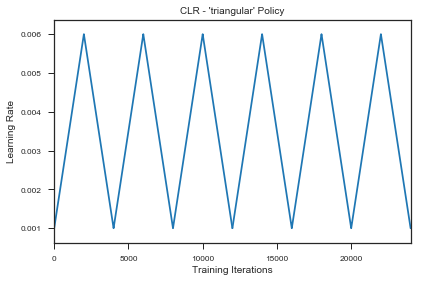

In [17]:
plt.xlabel('Training Iterations')
plt.ylabel('Learning Rate')
plt.title("CLR - 'triangular' Policy")
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [18]:
clr_triangular = CyclicLR(mode='triangular2')

model.compile(optimizer=SGD(), loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
model.fit(X, Y, batch_size=2000, nb_epoch=1, callbacks=[clr_triangular], verbose=0)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


In [20]:
clr_triangular._reset()

In [21]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular],verbose=0)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


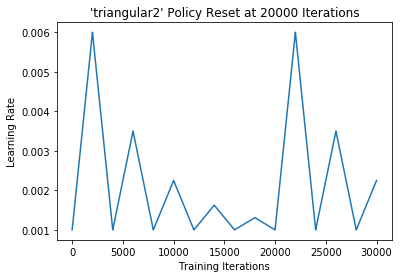

In [49]:
plt.xlabel('Training Iterations')
plt.ylabel('Learning Rate')
plt.title("'triangular2' Policy Reset at 20000 Iterations")
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [22]:
clr_triangular = CyclicLR(mode='exp_range', gamma=0.99994)

model.compile(optimizer=SGD(), loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
model.fit(X, Y, batch_size=2000, nb_epoch=20, callbacks=[clr_triangular], verbose=0)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


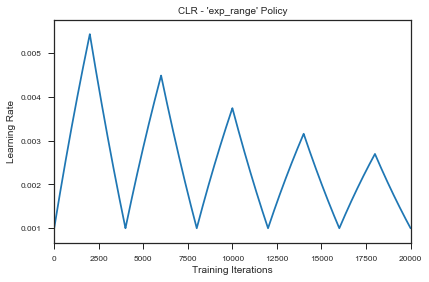

In [24]:
plt.xlabel('Training Iterations')
plt.ylabel('Learning Rate')
plt.title("CLR - 'exp_range' Policy")
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])

In [22]:
clr_triangular._reset(new_base_lr=0.003, new_max_lr=0.009)

In [23]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular], verbose=0)

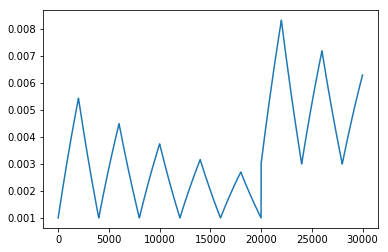

In [24]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])

In [28]:
clr = lambda x: 0.5*(1+np.sin(x*np.pi/2.))

In [29]:
clr_triangular = CyclicLR(scale_fn=clr, scale_mode='cycle')

model.compile(optimizer=SGD(), loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
model.fit(X, Y, batch_size=2000, nb_epoch=40, callbacks=[clr_triangular], verbose=0)

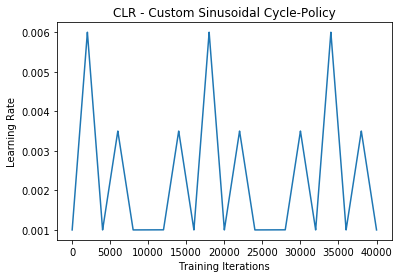

In [31]:
plt.xlabel('Training Iterations')
plt.ylabel('Learning Rate')
plt.title("CLR - Custom Sinusoidal Cycle-Policy")
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [50]:
clr = lambda x: 1/(5**(x*0.0001))

In [51]:
clr_triangular = CyclicLR(scale_fn=clr, scale_mode='iterations')

model.compile(optimizer=SGD(), loss='binary_crossentropy', metrics=['accuracy'])

In [52]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular],verbose=0)

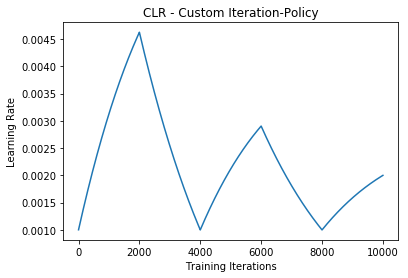

In [53]:
plt.xlabel('Training Iterations')
plt.ylabel('Learning Rate')
plt.title("CLR - Custom Iteration-Policy")
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])

### RMSprop

In [25]:
clr_triangular = CyclicLR(mode='triangular')

model.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular],verbose=0)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


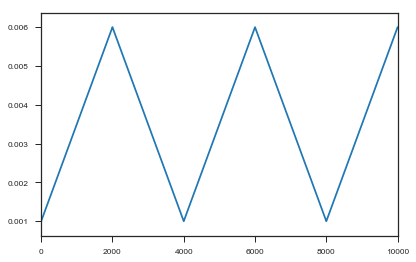

In [27]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])

In [116]:
clr_triangular = CyclicLR(mode='triangular2')

model.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['accuracy'])

In [117]:
model.fit(X, Y, batch_size=2000, nb_epoch=20, callbacks=[clr_triangular], verbose=0)

In [118]:
clr_triangular._reset()

In [119]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular], verbose=0)

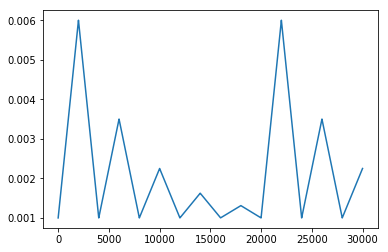

In [120]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])

In [121]:
clr_triangular = CyclicLR(mode='exp_range', gamma=0.99994)

model.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['accuracy'])

In [122]:
model.fit(X, Y, batch_size=2000, nb_epoch=20, callbacks=[clr_triangular], verbose=0)

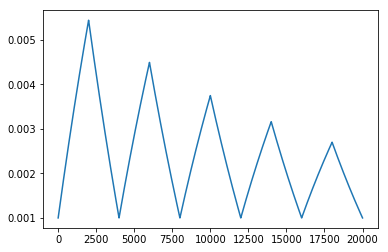

In [123]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [124]:
clr_triangular._reset(new_base_lr=0.003, new_max_lr=0.009)

In [125]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular], verbose=0)

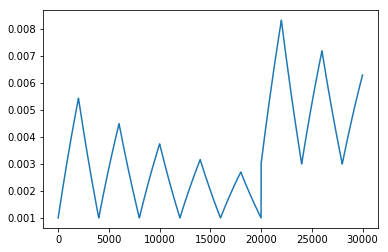

In [126]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [127]:
clr = lambda x: 0.5*(1+np.sin(x*np.pi/2.))

In [128]:
clr_triangular = CyclicLR(scale_fn=clr, scale_mode='cycle')

model.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['accuracy'])

In [129]:
model.fit(X, Y, batch_size=2000, nb_epoch=40, callbacks=[clr_triangular], verbose=0)

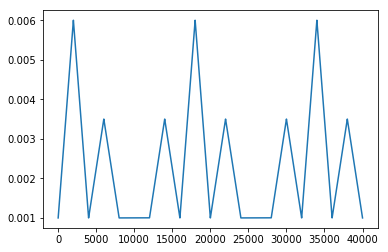

In [130]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [131]:
clr = lambda x: 1/(5**(x*0.0001))

In [132]:
clr_triangular = CyclicLR(scale_fn=clr, scale_mode='iterations')

model.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['accuracy'])

In [133]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular], verbose=0)

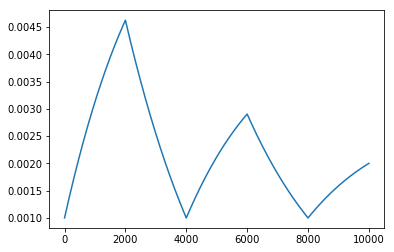

In [134]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


### Adagrad

In [135]:
clr_triangular = CyclicLR(mode='triangular')

model.compile(optimizer=Adagrad(), loss='binary_crossentropy', metrics=['accuracy'])

In [136]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular],verbose=0)

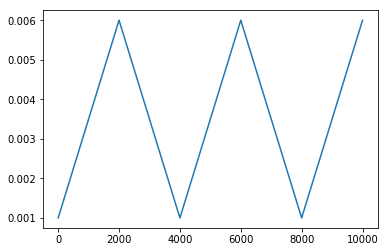

In [138]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [139]:
clr_triangular = CyclicLR(mode='triangular2')

model.compile(optimizer=Adagrad(), loss='binary_crossentropy', metrics=['accuracy'])

In [140]:
model.fit(X, Y, batch_size=2000, nb_epoch=20, callbacks=[clr_triangular], verbose=0)

In [141]:
clr_triangular._reset()

In [142]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular], verbose=0)

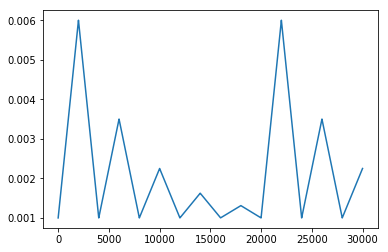

In [143]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [144]:
clr_triangular = CyclicLR(mode='exp_range', gamma=0.99994)

model.compile(optimizer=Adagrad(), loss='binary_crossentropy', metrics=['accuracy'])

In [145]:
model.fit(X, Y, batch_size=2000, nb_epoch=20, callbacks=[clr_triangular], verbose=0)

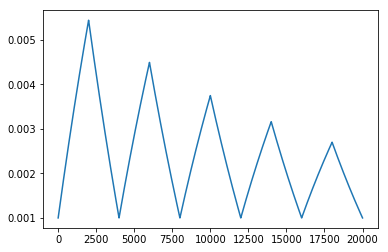

In [146]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [147]:
clr_triangular._reset(new_base_lr=0.003, new_max_lr=0.009)

In [148]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular], verbose=0)

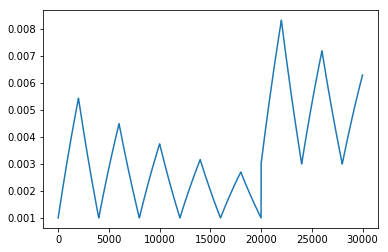

In [149]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [150]:
clr = lambda x: 0.5*(1+np.sin(x*np.pi/2.))

In [151]:
clr_triangular = CyclicLR(scale_fn=clr, scale_mode='cycle')

model.compile(optimizer=Adagrad(), loss='binary_crossentropy', metrics=['accuracy'])

In [152]:
model.fit(X, Y, batch_size=2000, nb_epoch=40, callbacks=[clr_triangular], verbose=0)

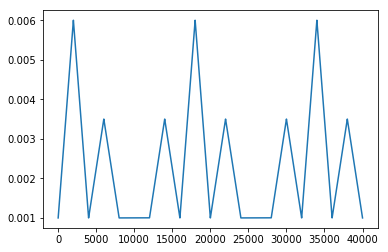

In [153]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [154]:
clr = lambda x: 1/(5**(x*0.0001))

In [155]:
clr_triangular = CyclicLR(scale_fn=clr, scale_mode='iterations')

model.compile(optimizer=Adagrad(), loss='binary_crossentropy', metrics=['accuracy'])

In [156]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular], verbose=0)

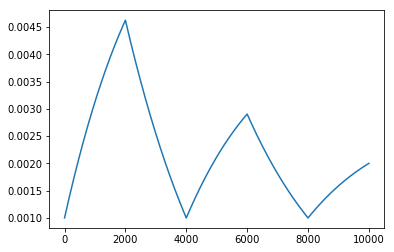

In [157]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


### Adadelta

In [158]:
clr_triangular = CyclicLR(mode='triangular')

model.compile(optimizer=Adadelta(), loss='binary_crossentropy', metrics=['accuracy'])

In [159]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular],verbose=0)

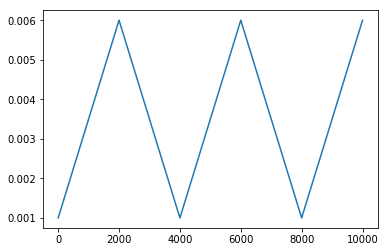

In [161]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [162]:
clr_triangular = CyclicLR(mode='triangular2')

model.compile(optimizer=Adadelta(), loss='binary_crossentropy', metrics=['accuracy'])

In [163]:
model.fit(X, Y, batch_size=2000, nb_epoch=20, callbacks=[clr_triangular], verbose=0)

In [164]:
clr_triangular._reset()

In [165]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular], verbose=0)

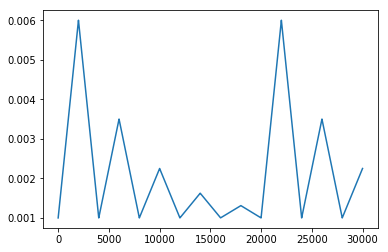

In [166]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [167]:
clr_triangular = CyclicLR(mode='exp_range', gamma=0.99994)

model.compile(optimizer=Adadelta(), loss='binary_crossentropy', metrics=['accuracy'])

In [168]:
model.fit(X, Y, batch_size=2000, nb_epoch=20, callbacks=[clr_triangular], verbose=0)

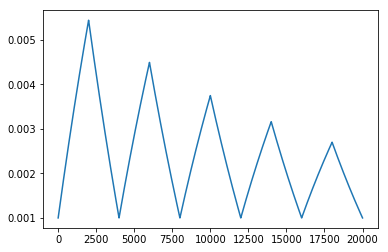

In [169]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [170]:
clr_triangular._reset(new_base_lr=0.003, new_max_lr=0.009)

In [171]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular], verbose=0)

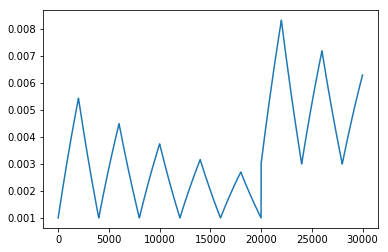

In [172]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [173]:
clr = lambda x: 0.5*(1+np.sin(x*np.pi/2.))

In [174]:
clr_triangular = CyclicLR(scale_fn=clr, scale_mode='cycle')

model.compile(optimizer=Adadelta(), loss='binary_crossentropy', metrics=['accuracy'])

In [175]:
model.fit(X, Y, batch_size=2000, nb_epoch=40, callbacks=[clr_triangular], verbose=0)

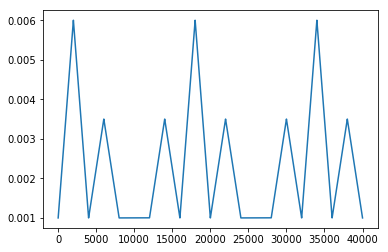

In [176]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [177]:
clr = lambda x: 1/(5**(x*0.0001))

In [178]:
clr_triangular = CyclicLR(scale_fn=clr, scale_mode='iterations')

model.compile(optimizer=Adadelta(), loss='binary_crossentropy', metrics=['accuracy'])

In [179]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular], verbose=0)

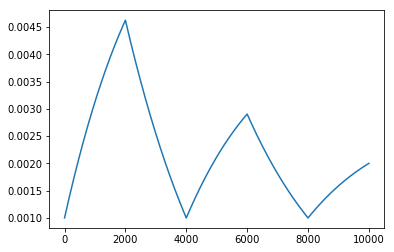

In [180]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


### Adam

In [181]:
clr_triangular = CyclicLR(mode='triangular')

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [182]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular],verbose=0)

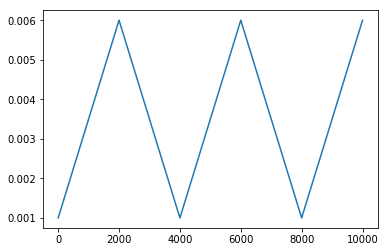

In [184]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [185]:
clr_triangular = CyclicLR(mode='triangular2')

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [186]:
model.fit(X, Y, batch_size=2000, nb_epoch=20, callbacks=[clr_triangular], verbose=0)

In [187]:
clr_triangular._reset()

In [188]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular], verbose=0)

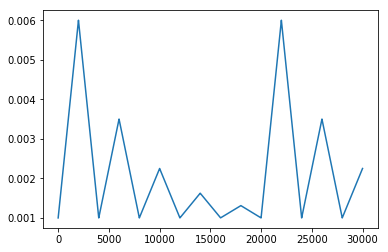

In [189]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [190]:
clr_triangular = CyclicLR(mode='exp_range', gamma=0.99994)

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [191]:
model.fit(X, Y, batch_size=2000, nb_epoch=20, callbacks=[clr_triangular], verbose=0)

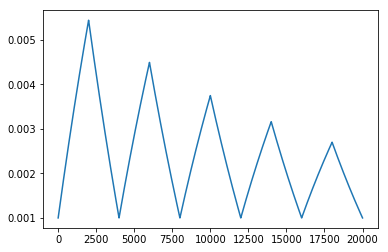

In [192]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [193]:
clr_triangular._reset(new_base_lr=0.003, new_max_lr=0.009)

In [194]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular], verbose=0)

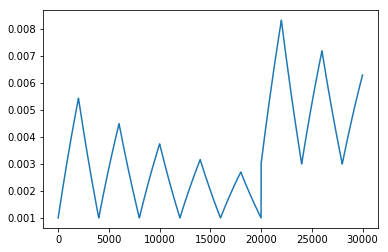

In [195]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [196]:
clr = lambda x: 0.5*(1+np.sin(x*np.pi/2.))

In [197]:
clr_triangular = CyclicLR(scale_fn=clr, scale_mode='cycle')

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [198]:
model.fit(X, Y, batch_size=2000, nb_epoch=40, callbacks=[clr_triangular], verbose=0)

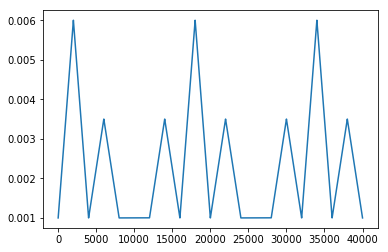

In [199]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [200]:
clr = lambda x: 1/(5**(x*0.0001))

In [201]:
clr_triangular = CyclicLR(scale_fn=clr, scale_mode='iterations')

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [202]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular], verbose=0)

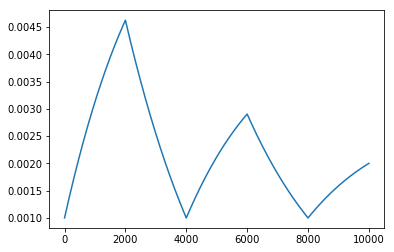

In [203]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


### Adamax

In [54]:
clr_triangular = CyclicLR(mode='triangular')

model.compile(optimizer=Adamax(), loss='binary_crossentropy', metrics=['accuracy'])

In [55]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular],verbose=0)

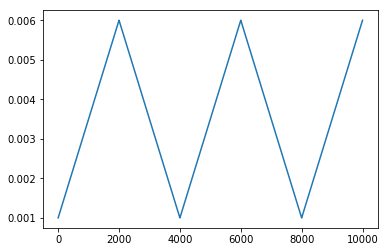

In [56]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [208]:
clr_triangular = CyclicLR(mode='triangular2')

model.compile(optimizer=Adamax(), loss='binary_crossentropy', metrics=['accuracy'])

In [209]:
model.fit(X, Y, batch_size=2000, nb_epoch=20, callbacks=[clr_triangular], verbose=0)

In [210]:
clr_triangular._reset()

In [211]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular], verbose=0)

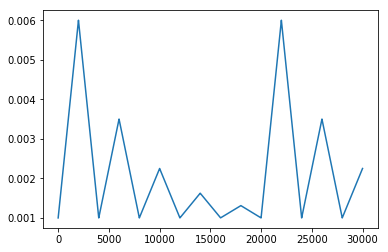

In [212]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [213]:
clr_triangular = CyclicLR(mode='exp_range', gamma=0.99994)

model.compile(optimizer=Adamax(), loss='binary_crossentropy', metrics=['accuracy'])

In [214]:
model.fit(X, Y, batch_size=2000, nb_epoch=20, callbacks=[clr_triangular], verbose=0)

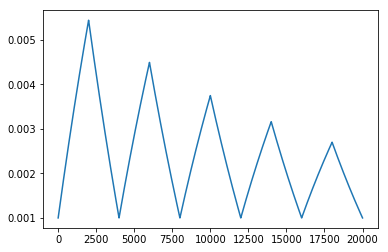

In [215]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [216]:
clr_triangular._reset(new_base_lr=0.003, new_max_lr=0.009)

In [217]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular], verbose=0)

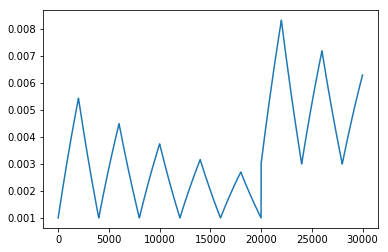

In [218]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [219]:
clr = lambda x: 0.5*(1+np.sin(x*np.pi/2.))

In [220]:
clr_triangular = CyclicLR(scale_fn=clr, scale_mode='cycle')

model.compile(optimizer=Adamax(), loss='binary_crossentropy', metrics=['accuracy'])

In [221]:
model.fit(X, Y, batch_size=2000, nb_epoch=40, callbacks=[clr_triangular], verbose=0)

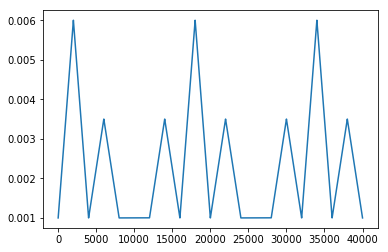

In [222]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [223]:
clr = lambda x: 1/(5**(x*0.0001))

In [224]:
clr_triangular = CyclicLR(scale_fn=clr, scale_mode='iterations')

model.compile(optimizer=Adamax(), loss='binary_crossentropy', metrics=['accuracy'])

In [225]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular], verbose=0)

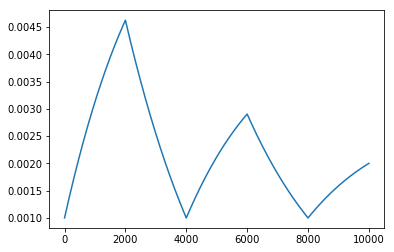

In [226]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


### Nadam

In [227]:
clr_triangular = CyclicLR(mode='triangular')

model.compile(optimizer=Nadam(), loss='binary_crossentropy', metrics=['accuracy'])

In [228]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular],verbose=0)

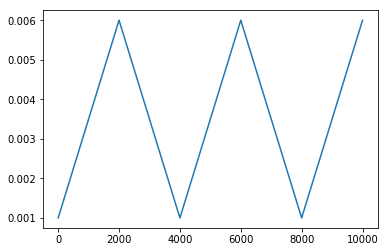

In [230]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [231]:
clr_triangular = CyclicLR(mode='triangular2')

model.compile(optimizer=Nadam(), loss='binary_crossentropy', metrics=['accuracy'])

In [232]:
model.fit(X, Y, batch_size=2000, nb_epoch=20, callbacks=[clr_triangular], verbose=0)

In [233]:
clr_triangular._reset()

In [234]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular], verbose=0)

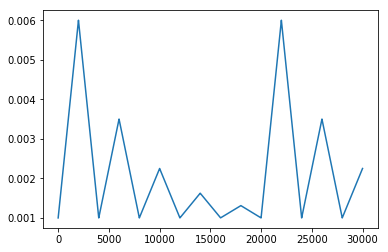

In [235]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [236]:
clr_triangular = CyclicLR(mode='exp_range', gamma=0.99994)

model.compile(optimizer=Nadam(), loss='binary_crossentropy', metrics=['accuracy'])

In [237]:
model.fit(X, Y, batch_size=2000, nb_epoch=20, callbacks=[clr_triangular], verbose=0)

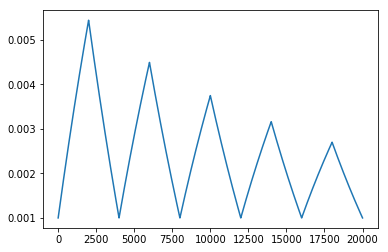

In [238]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [239]:
clr_triangular._reset(new_base_lr=0.003, new_max_lr=0.009)

In [240]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular], verbose=0)

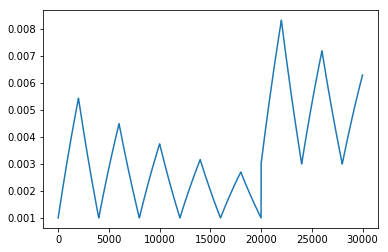

In [241]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [242]:
clr = lambda x: 0.5*(1+np.sin(x*np.pi/2.))

In [243]:
clr_triangular = CyclicLR(scale_fn=clr, scale_mode='cycle')

model.compile(optimizer=Nadam(), loss='binary_crossentropy', metrics=['accuracy'])

In [244]:
model.fit(X, Y, batch_size=2000, nb_epoch=40, callbacks=[clr_triangular], verbose=0)

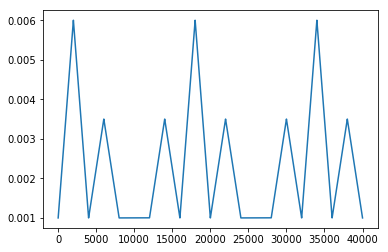

In [245]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])


In [246]:
clr = lambda x: 1/(5**(x*0.0001))

In [247]:
clr_triangular = CyclicLR(scale_fn=clr, scale_mode='iterations')

model.compile(optimizer=Nadam(), loss='binary_crossentropy', metrics=['accuracy'])

In [248]:
model.fit(X, Y, batch_size=2000, nb_epoch=10, callbacks=[clr_triangular], verbose=0)

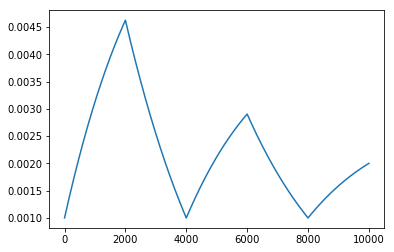

In [249]:
plt.plot(clr_triangular.history['iterations'], clr_triangular.history['lr'])
